<a href="https://colab.research.google.com/github/Malope-cmd/Malope-cmd/blob/main/Task_3_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('./clean_data_after_eda.csv')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [ ]:

df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [ ]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [ ]:
price_df = pd.read_csv('price_data.csv')
client_df = pd.read_csv("client_data.csv")
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [ ]:
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]


In [ ]:
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [ ]:
# Checking if last month's electricity consumption isn't the same as current paid consumption
client_df[['id','cons_last_month', 'imp_cons']].head(10)

,id,cons_last_month,imp_cons
0,24011ae4ebbe3035111d65fa7c15bc57,0,0.00
1,d29c2c54acc38ff3c0614d0a653813dd,0,0.00
2,764c75f661154dac3a6c254cd082ea7d,0,0.00
3,bba03439a292a1e166f80264c16191cb,0,0.00
4,149d57cf92fc41cf94415803a877cb4b,526,52.32
5,1aa498825382410b098937d65c4ec26d,1998,181.21
6,7ab4bf4878d8f7661dfc20e9b8e18011,0,0.00
7,01495c955be7ec5e7f3203406785aae0,1260,70.63
8,f53a254b1115634330c12c7fdbf7958a,0,0.00
9,10c1b2f97a2d2a6f10299dc213d1a370,2188,219.59


In [ ]:
#Mergin the two dataframes by id
data_df = pd.merge(df, diff, on='id')

In [ ]:
# Combining the 12 months power and energy comsumptions
# If clients pays for gas too, we take the average the add las month's power consumption

data_df['12m_avg_cons'] = np.where(data_df['has_gas'] == 't',
                                   (data_df['cons_12m'] + data_df['cons_gas_12m']) / 2 + data_df['cons_last_month'],
                                   data_df['cons_12m'] + data_df['cons_last_month'])

In [ ]:
# Rename the categories in channel_sales

cat_un = data_df['channel_sales'].unique()
cat_map = {cat: f"Sales_ch{i+1}" for i, cat in enumerate(cat_un)}
data_df['channel_sales'] = data_df['channel_sales'].map(cat_map)

In [ ]:
# Rename the categories in 'origin_up' for readability

cats = data_df['origin_up'].unique()
cats_m = {cat: f"Campaign_{m+1}" for m, cat in enumerate(cats)}
data_df['origin_up'] = data_df['origin_up'].map(cats_m)

In [ ]:
data_df[['channel_sales','origin_up']].head()

,channel_sales,origin_up
0,Sales_ch1,Campaign_1
1,Sales_ch2,Campaign_2
2,Sales_ch1,Campaign_2
3,Sales_ch3,Campaign_2
4,Sales_ch2,Campaign_2


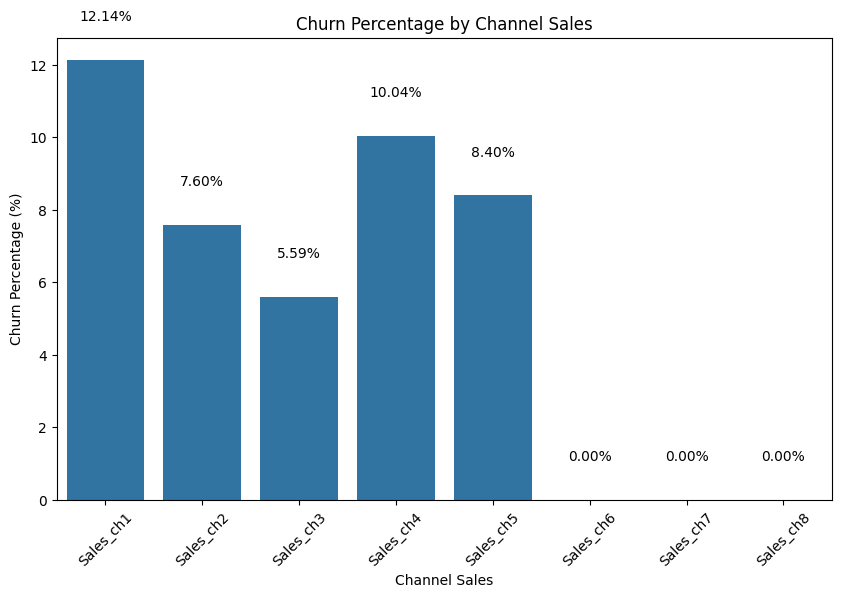

In [ ]:
# Group data by 'channel_sales' and calculate churn percentage to see where the most churn is
# The aim is to split the variable into two categories Sale_ch1 and Sale_ch2

churn_by_channel = data_df.groupby('channel_sales')['churn'].mean() * 100


plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_channel.index, y=churn_by_channel.values)
plt.xlabel('Channel Sales')
plt.ylabel('Churn Percentage (%)')
plt.title('Churn Percentage by Channel Sales')
plt.xticks(rotation=45)
for i, v in enumerate(churn_by_channel.values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')

plt.show()

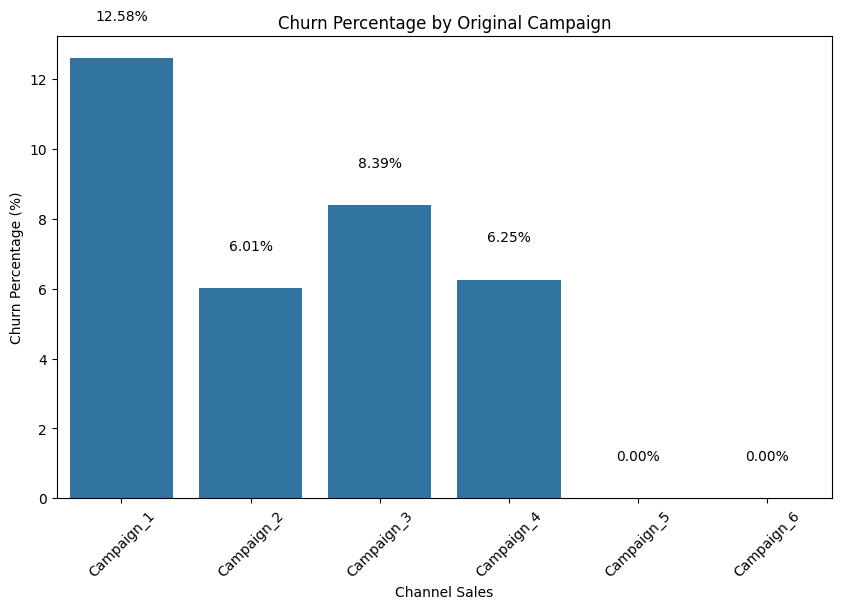

In [ ]:
# Perform a similar analysis for the origin_up variable

churn_by_org = data_df.groupby('origin_up')['churn'].mean() * 100


plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_org.index, y=churn_by_org.values)
plt.xlabel('Channel Sales')
plt.ylabel('Churn Percentage (%)')
plt.title('Churn Percentage by Original Campaign')
plt.xticks(rotation=45)

for i, v in enumerate(churn_by_org.values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')

plt.show()

In [ ]:
category_cot = data_df.groupby('origin_up')['id'].count()
category_proportion = category_cot / len(data_df)
print(category_proportion)

origin_up
Campaign_1    0.485896
Campaign_2    0.293989
Campaign_3    0.215528
Campaign_4    0.004382
Campaign_5    0.000137
Campaign_6    0.000068
Name: id, dtype: float64


In [ ]:
# Viewing the proportion of entries in each channel of sales for a proper split

category_co = data_df.groupby('channel_sales')['id'].count()
category_proportions = category_co / len(data_df)
print(category_proportions)

channel_sales
Sales_ch1    0.462413
Sales_ch2    0.255032
Sales_ch3    0.126181
Sales_ch4    0.094139
Sales_ch5    0.061139
Sales_ch6    0.000205
Sales_ch7    0.000753
Sales_ch8    0.000137
Name: id, dtype: float64


In [ ]:
# Combining original electricity campaing 1 through 4 into one category and,
# the rest into another
# The rationale is to see if belonging to these campaign has an effect on churning

Campaig_A = ['Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4']
data_df['up_orig_up'] = data_df['origin_up'].apply(lambda x: "Campaign_A" if x in Campaig_A else 'Campaign_B')

In [ ]:
# Categories 1 though 5 have church proportions greater than 5%
# Combine those into one category then the rest to another


sales_chA_list = ['Sales_ch1', 'Sales_ch2', 'Sales_ch3', 'Sales_ch4']

data_df['comb_sales_ch'] = data_df['channel_sales'].apply(lambda x: 'Sales_chA' if x in sales_chA_list else 'Sales_chB')

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
# Data for random forest

rf_d = data_df[['12m_avg_cons',
                'offpeak_diff_dec_january_power',
                'offpeak_diff_dec_january_energy',
                'pow_max',
                'num_years_antig',
                'net_margin',
                'nb_prod_act',
                'forecast_discount_energy',
                'forecast_price_energy_off_peak',
                'forecast_price_pow_off_peak',
                'churn',
                'has_gas',
                'comb_sales_ch',
                'up_orig_up'
                 ]]

 # 'origin_up''channel_sales' are not included because they have more than one category

In [ ]:
# This makes the categorical variables compatible with the random forest algorithm,
# The original variables are still intact

rf_d['has_gas'] = rf_d['has_gas'].map({'t': 1 , 'f': 0})  # Turning the variable into a {0,1} response
rf_d['comb_sales_ch'] = rf_d['comb_sales_ch'].map({'Sales_chA': 1, 'Sales_chB': 0})  # {0,1} also for the updated sales channel variable
rf_d['up_orig_up'] = rf_d['up_orig_up'].map({'Campaign_A': 1, 'Campaign_B': 0})  # {0,1} also for the updated origin_up variable

<ipython-input-49-5c0f058792ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_d['has_gas'] = rf_d['has_gas'].map({'t': 1 , 'f': 0})  # Turning the variable into a {0,1} response
<ipython-input-49-5c0f058792ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_d['comb_sales_ch'] = rf_d['comb_sales_ch'].map({'Sales_chA': 1, 'Sales_chB': 0})  # {0,1} also for the updated sales channel variable
<ipython-input-49-5c0f058792ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [ ]:
# Viewing the updated variables

rf_d[['churn','has_gas', 'comb_sales_ch', 'up_orig_up']].tail(10)

,churn,has_gas,comb_sales_ch,up_orig_up
14596,0,0,1,1
14597,0,0,0,1
14598,0,0,1,1
14599,0,1,1,1
14600,0,0,1,1
14601,0,1,1,1
14602,1,0,1,1
14603,1,0,1,1
14604,0,0,1,1
14605,0,0,1,1


In [ ]:
rf_d.head(10)

,12m_avg_cons,offpeak_diff_dec_january_power,offpeak_diff_dec_january_energy,pow_max,num_years_antig,net_margin,nb_prod_act,forecast_discount_energy,forecast_price_energy_off_peak,forecast_price_pow_off_peak,churn,has_gas,comb_sales_ch,up_orig_up
0,27473.0,3.700961,0.020057,43.648,3,678.99,2,0.0,0.114481,40.606701,1,1,1,1
1,4660.0,0.177779,-0.003767,13.800,6,18.89,1,0.0,0.145711,44.311378,0,0,1,1
2,544.0,0.177779,-0.004670,13.856,6,6.60,1,0.0,0.165794,44.311378,0,0,1,1
3,1584.0,0.177779,-0.004547,13.200,6,25.46,1,0.0,0.146694,44.311378,0,0,1,1
4,4951.0,0.162916,-0.006192,19.800,6,47.98,1,0.0,0.116900,40.606701,0,0,1,1
5,10300.0,-0.000001,-0.008087,13.200,4,118.89,1,0.0,0.164775,45.308378,1,0,1,1
6,45097.0,0.000000,-0.004628,15.000,4,346.63,1,0.0,0.166178,44.311378,1,0,1,1
7,30812.0,0.162916,-0.007801,26.400,6,100.09,1,0.0,0.115174,40.606701,0,0,1,1
8,2962.0,0.177779,-0.003767,13.200,4,42.59,1,0.0,0.145711,44.311378,0,0,1,1
9,28252.0,0.000000,-0.007137,31.500,6,329.60,1,0.0,0.115761,40.606701,0,0,1,1


In [ ]:
# Split the data into training and test data
# But the aim is to use 5-folds cross validation

X = rf_d.drop('churn', axis=1)
y = rf_d['churn']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 4)

In [ ]:
# Hyperparameter Tuning for the random forest
param_dist = {'n_estimators': randint(50, 500),
              'max_depth': randint(1, 10),
              'min_samples_split': randint(2, 10),
              'random_state': [42]
             }

mod = RandomForestClassifier()

rand_f = RandomizedSearchCV(mod,
                               param_distributions = param_dist,
                               n_iter = 10,
                               cv = 6
                              )


rand_f.fit(x_train, y_train)

print("Best hyperparameter:", rand_f.best_params_)


Best hyperparameter: {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 233, 'random_state': 42}


In [ ]:
# Refitting the model with the better parameters
best_mod = rand_f.best_estimator_

rand_f = RandomForestClassifier(**best_mod.get_params())

rand_f.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_split=5, n_estimators=233,
                       random_state=42)

In [ ]:
predictions = rand_f.predict(x_test)

In [ ]:
# Checking how well the model performs on the training data
# My rule of thumb is a minimum of 90% precision

preds = rand_f.predict(x_train)
print(accuracy_score(y_train, preds))

0.9020027387880862


In [ ]:
# Perfomance metrics

acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions, zero_division='warn')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print('Precision:', round(prec,3))  # May be zero not due to model imperfection, but division-by-zero error
print('Accuracy:', round(acc,3))

Precision: 0.0
Accuracy: 0.906


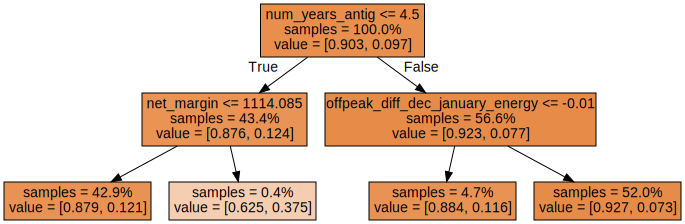

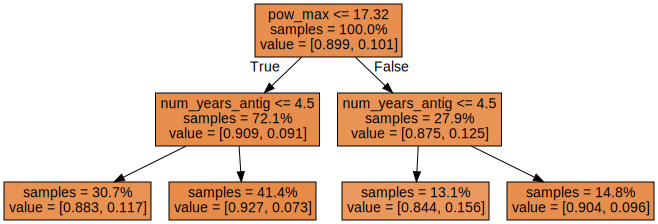

In [ ]:
 #Visualize the first 2 trees

for i in range(2):
       tree = rand_f.estimators_[i]
       dot_data = export_graphviz(tree,
                                  feature_names=x_train.columns,
                                  filled=True,
                                  max_depth=2,  # Limit depth for readability
                                  impurity=False,
                                  proportion=True)
       graph = graphviz.Source(dot_data)
       display(graph)

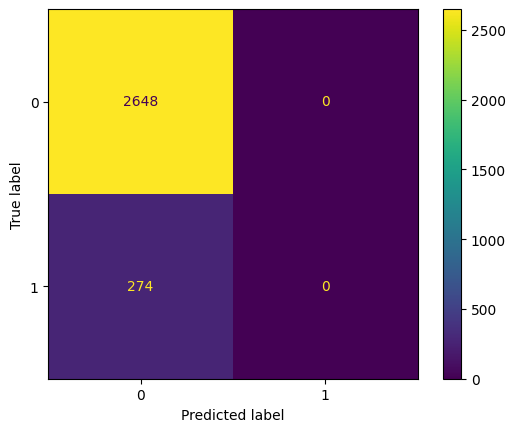

In [ ]:
# confusion_matrix

conf_mat = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix = conf_mat).plot();

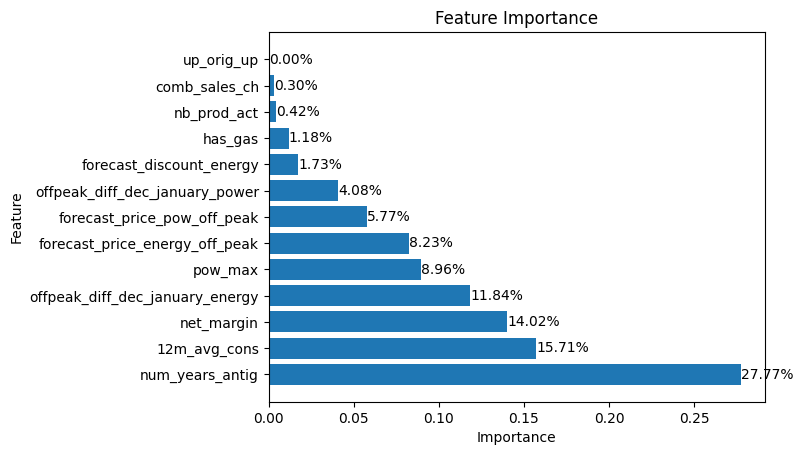

In [ ]:
feat_imp = pd.Series(rand_f.feature_importances_, index=x_train.columns).sort_values(ascending=False)
plt.barh(feat_imp.index, feat_imp.values)

for i, v in enumerate(feat_imp.values):
    plt.text(v, i, f"{v:.2%}", color='black', va='center')

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Turns out the features I engineerd for the categorical variables are not that important for this forest as they explain less than 10% of the variation.


The six most important factors is how long the client has been with PowerCo, their avergae 12m months consumption, total net margin, off peak dec-jan price differences for energy and power, and current subscribed power.